In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Introduction
This report's aim is to show the process of processing the IMDb movie dataset and so answer some of the questions with regards to how some columns affect others through the use of statistic tests such as t-test and ANOVA.

# Exploring dataset


In [141]:
# loading dataset
df_main = pd.read_csv('tmdb_5000_movies.csv')

In [143]:
# Summary of dataset
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

To get a better look at the features, the dataframe is transposed.

In [144]:
df_main.T

,0,1,2,3,4,5,6,7,8,9,...,4793,4794,4795,4796,4797,4798,4799,4800,4801,4802
budget,237000000,300000000,245000000,250000000,260000000,258000000,260000000,280000000,250000000,250000000,...,0,0,0,7000,0,220000,9000,0,0,0
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...","[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",...,"[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 53, ""name"": ""Thriller""}, {""id"": 27, ""n...","[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...","[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",[],"[{""id"": 99, ""name"": ""Documentary""}]"
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/,http://www.thedarkknightrises.com/,http://movies.disney.com/john-carter,http://www.sonypictures.com/movies/spider-man3/,http://disney.go.com/disneypictures/tangled/,http://marvel.com/movies/movie/193/avengers_ag...,http://harrypotter.warnerbros.com/harrypottera...,http://www.batmanvsupermandawnofjustice.com/,...,NaN,NaN,NaN,http://www.primermovie.com,NaN,NaN,NaN,http://www.hallmarkchannel.com/signedsealeddel...,http://shanghaicalling.com/,NaN
id,19995,285,206647,49026,49529,559,38757,99861,767,209112,...,182291,286939,124606,14337,67238,9367,72766,231617,126186,25975
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...","[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...","[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...","[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""n...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 7002...",...,"[{""id"": 718, ""name"": ""confession""}, {""id"": 100...",[],"[{""id"": 10726, ""name"": ""gang""}, {""id"": 33928, ...","[{""id"": 1448, ""name"": ""distrust""}, {""id"": 2101...",[],"[{""id"": 5616, ""name"": ""united states\u2013mexi...",[],"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",[],"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224..."
original_language,en,en,en,en,en,en,en,en,en,en,...,en,en,en,en,en,es,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,...,On The Downlow,Sanctuary: Quite a Conundrum,Bang,Primer,Cavite,El Mariachi,Newlyweds,"Signed, Sealed, Delivered",Shanghai Calling,My Date with Drew
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca...",The seemingly invincible Spider-Man goes up ag...,When the kingdom's most wanted-and most charmi...,When Tony Stark tries to jumpstart a dormant p...,"As Harry begins his sixth year at Hogwarts, he...",Fearing the actions of a god-like Super Hero l...,...,Isaac and A

From here, some features that are not useful for analysis can be dropped: homepage, original_title, overview, tagline
Reason: They are either in text that is not easy to analyze (tagline, overview), functionally the same as another feature (original_title is not functionally different from title) , or contains too many NaN values (homepage, for example)

In [145]:
df_main = df_main.drop(columns=['homepage', 'original_title', 'tagline', 'overview'])

# Question 1
## What areas have the most influence on revenue? 

To answer this question, the data will be narrowed down to the relevant columns

In [193]:
df_narrowed = df_main[['id', 'title', 'production_countries', 'revenue']]

In [148]:
df_narrowed.head(5)

,id,title,production_countries,revenue
0,19995,Avatar,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087
1,285,Pirates of the Caribbean: At World's End,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000
2,206647,Spectre,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",880674609
3,49026,The Dark Knight Rises,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1084939099
4,49529,John Carter,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",284139100


In [149]:
# create an empty DataFrame for tests
df_countries = pd.DataFrame(columns = ['country', 'revenue'])

def dataPrep(row):
    global df_countries
    d = {}
    countries = np.array([g['name'] for g in eval(row['production_countries'])])
    n = countries.size
    d['revenue'] = [row['revenue']]*n
    d['country'] = []
    for country in countries:
        d['country'].append(country)
    df_countries = df_countries.append(pd.DataFrame(d), ignore_index=True, sort=True)

In [150]:
df_narrowed.apply(dataPrep, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
4798    None
4799    None
4800    None
4801    None
4802    None
Length: 4803, dtype: object

In [151]:
df_countries = df_countries[['country', 'revenue']]
df_countries

,country,revenue
0,United States of America,2787965087
1,United Kingdom,2787965087
2,United States of America,961000000
3,United Kingdom,880674609
4,United States of America,880674609
...,...,...
6431,United States of America,2040920
6432,United States of America,0
6433,United States of America,0
6434,China,0


Now, a DataFrame with only the movies' country of production and revenue is produced.

In [164]:
unique_countries = df_countries['country'].unique()
unique_countries.size # there are 88 countries

88

A one-way ANOVA test will be conducted to check if the region affects the revenue of the movie

Null hypothesis: The region does not affect the revenue

Anti hypothesis: The region affects the revenue (each region affects the revenue differently)

In [179]:
import scipy.stats as stats

stats.f_oneway(*(df_countries[df_countries['country'] == country]['revenue'] for country in unique_countries))

F_onewayResult(statistic=2.865259893293308, pvalue=3.992985780378195e-17)

Since the pvalue obtained is smaller than 0.05, it can be concluded that the revenue is affected differently by different regions, the null hypothesis is rejected.

In [190]:
df_countries.groupby('country').sum().sort_values(by='revenue', ascending=False)

,revenue
country,
United States of America,380026795469
United Kingdom,60084988968
Germany,25480164585
Canada,14990315869
France,14187924310
...,...
Kenya,0
Lebanon,0
Libyan Arab Jamahiriya,0


It can be easily seen here that the United States of America and European countries have the biggest influence on revenue, while countries like Malaysia and Afghanistan have the least influence.

# Question 2: 

## How is a movie’s revenue and average score affected by its genre?

To answer this question, two ANOVA tests will be conducted to check if a movie's average score and revenue is affected in the same or in different ways by its genre.

First test: genre's effect on revenue
- Null hypothesis: A movie's revenue is not affected by genre 
- Anti hypothesis: A movie's revenue is affected by genre

Second test: genre's effect on average score
- Null hypothesis: A movie's average score is not affected by genre
- Anti hypothesis: A movie's average score is affected by genre

In [194]:
df_narrowed2 = df_main[['id', 'title', 'genres', 'revenue', 'vote_average']]

df_genres = pd.DataFrame(columns = ['genre', 'revenue', 'vote_average'])

def dataPrep2(row):
    global df_genres
    d = {}
    genres = np.array([g['name'] for g in eval(row['genres'])])
    n = genres.size
    d['revenue'] = [row['revenue']]*n
    d['vote_average'] = [row['vote_average']]*n
    d['genre'] = []
    for genre in genres:
        d['genre'].append(genre)
    df_genres = df_genres.append(pd.DataFrame(d), ignore_index=True, sort=True)

df_narrowed2.apply(dataPrep2, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
4798    None
4799    None
4800    None
4801    None
4802    None
Length: 4803, dtype: object

Occurrences of each genre:

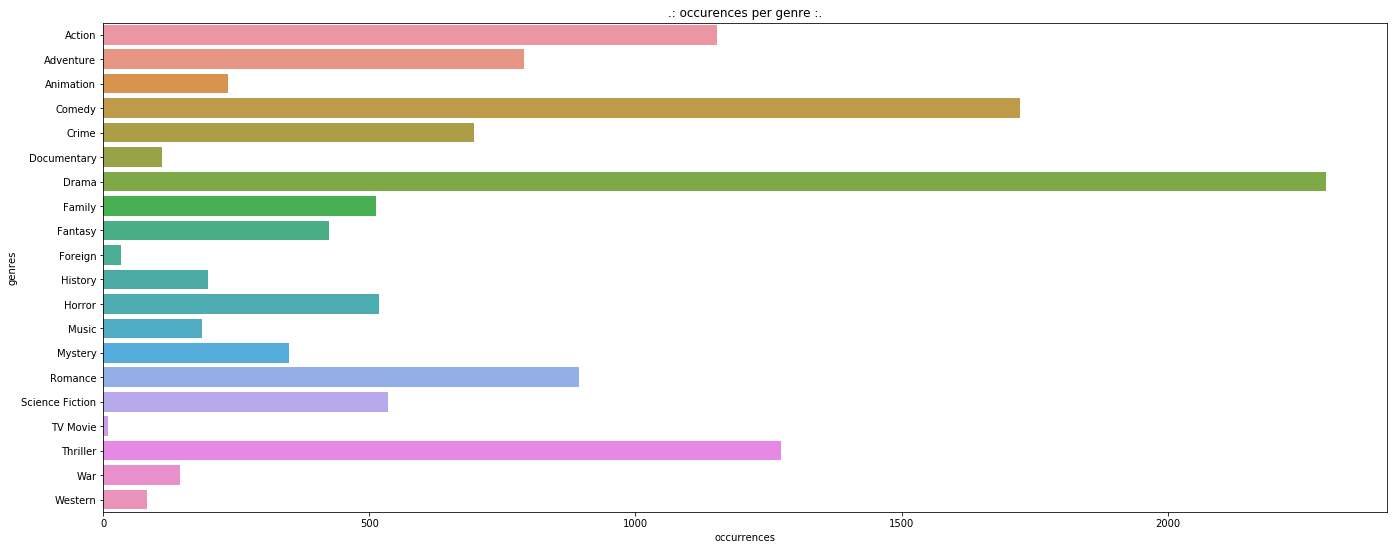

In [200]:
genre_count = df_genres['genre'].value_counts().sort_index()
df_gCount = pd.DataFrame({'genre': genre_count.index, 'count': genre_count.values})
f, ax = plt.subplots(figsize=(23, 9))
sns.barplot(x = 'count', y = 'genre', data=df_gCount)
ax.set_title('.: occurences per genre :.')
ax.set_xlabel('occurrences')
ax.set_ylabel('genres')
plt.show()

The most dominant genres seem to be Action, Comedy, Drama and Thriller

In [202]:
genres = df_genres['genre'].unique()

In [203]:
stats.f_oneway(*(df_genres[df_genres['genre'] == genre]['revenue'] for genre in genres))

F_onewayResult(statistic=63.70999543430208, pvalue=4.648998532712295e-233)

In [204]:
stats.f_oneway(*(df_genres[df_genres['genre'] == genre]['vote_average'] for genre in genres))

F_onewayResult(statistic=27.371078219308675, pvalue=5.4671346376761085e-96)

Since the pvalues for both the tests are smaller than 0.05, it can be concluded that both revenue and average score are affected by the genre of the movie.

Next, to observe the distribution of average score and revenue by genre, a heatmap can be used.

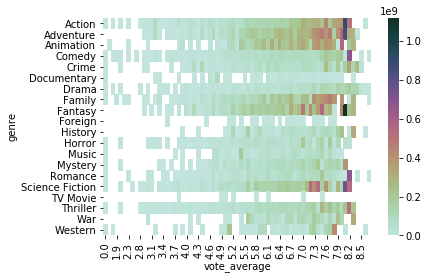

In [222]:
df_genres = df_genres.infer_objects()
df_pivot = df_genres.pivot_table(index=['genre'], columns=['vote_average'], values='revenue', aggfunc=np.mean)
cmap = sns.cubehelix_palette(start=1.5, rot=1.5, as_cmap=True)
ax = sns.heatmap(df_pivot, cmap = cmap)

On this heatmap, it can be seen that:
- Movies in some of the most dominant genres (Action, Adventure, Romance) tend to have high revenue.
- There are some other movies with high revenue and high ratings